In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crypto_path = "crypto_data.csv"

In [3]:
#Read in initial CSV
initial_df = pd.read_csv(crypto_path)
initial_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Use .loc to add filter for traded cryptos
trade_df = initial_df.loc[initial_df['IsTrading']==True,:]
trade_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
#Filter out columns that don't have numericdata
trade_df2 = trade_df.drop(columns=["IsTrading", "CoinName", "Unnamed: 0"])

In [6]:
#Drop nulls from the table
full_df = trade_df2.dropna()
full_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [7]:
#Add filter for only coins that have been mined
mine_df = full_df.loc[(full_df["TotalCoinsMined"] > 0)]
mine_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Use get_dummies to create dummy variables and standardize table
final_df = pd.get_dummies(mine_df[['Algorithm', 'ProofType']])
final_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Scale the data to standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

In [10]:
#Use PCA to perform dimensionality reduction
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 1.01647329e+00, -6.88639640e-01, -1.89209342e-16, ...,
        -1.12756282e-01,  1.43423439e-01, -1.11808809e-01],
       [ 1.01647329e+00, -6.88639640e-01, -9.78109204e-16, ...,
        -1.12756282e-01,  1.43423439e-01, -1.11808809e-01],
       [ 1.79064645e+00, -7.45814843e-01, -7.51365961e-14, ...,
        -2.21139793e-01, -3.98762910e-01,  7.80831692e-03],
       ...,
       [-2.28381334e+00,  4.85356512e-01, -6.89216147e-15, ...,
         1.99161950e-02,  3.76066593e-01,  6.21368269e-02],
       [-2.05188776e+00,  4.62118225e-01,  1.03904566e-15, ...,
        -1.04391337e-01,  3.47950915e-01,  8.10869349e-02],
       [ 8.11198959e-01, -3.08884871e-01, -2.18121117e-15, ...,
         5.12509400e-01,  1.01548191e+00, -5.09881634e-02]])

In [11]:
#Further reduce with t-SNE
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(pca_data)
tsne_features

array([[ 11.384657 ,   6.4192457],
       [ 10.938391 ,   7.339561 ],
       [ 14.014055 ,  14.256415 ],
       ...,
       [-16.319378 , -17.249508 ],
       [-16.374264 ,  -3.902301 ],
       [ -5.0046163,   8.9139805]], dtype=float32)

In [12]:
final_df['x'] = tsne_features[:,0]
final_df['y'] = tsne_features[:,1]

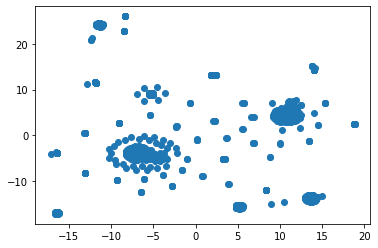

In [13]:
#Use Scatter plot to show results
plt.scatter(final_df['x'], final_df['y'])
plt.show()

# Cluster Analysis

There appear to be multiple clusters in the plot. Specifically, there are two larger clusters with 2-3 smaller groupings around them. 

In [14]:
#Using k-means to create elbow plot
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(final_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\willt\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,122943.046875
1,2,74688.382812
2,3,41895.867188
3,4,24292.652344
4,5,17994.984375


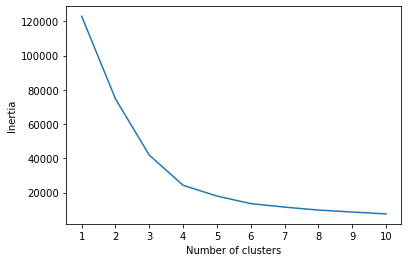

In [15]:
#Create elbow plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [17]:
clusters = get_clusters(4, final_df)

In [18]:
clusters

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,x,y,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11.384657,6.419246,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.938391,7.339561,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.014055,14.256415,3
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-11.757152,24.348743,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-13.031693,-8.210006,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-12.238217,21.280666,1
1242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12.477185,6.676651,3
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-16.319378,-17.249508,2
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-16.374264,-3.902301,2


In [19]:
#Create plot
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.show()

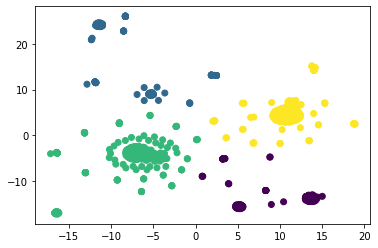

In [20]:
show_clusters(clusters)

# Crypto Analysis

From the above graph, the cryptocurrencies can be separeted into four clusters with two clusters being much larger than the rest. It is recommended that the clients focus mainly on the two larger clusters to increase their gains. Specifically, the yellow cluster and the green cluster. 